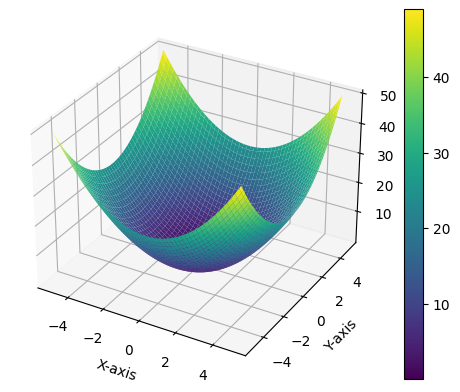

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the function you want to plot
def my_function(x, y):
    return x**2 + y**2  # Example: a simple quadratic function

# Create a grid of x and y values
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = my_function(X, Y)

# Create a 3D figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Create the surface plot
surf = ax.plot_surface(X, Y, Z, cmap='viridis')

# Add labels and a color bar
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
fig.colorbar(surf)

# Show the plot
plt.show()

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [6]:
training_data = pd.read_csv("./hw2_data/train.csv")
testing_data = pd.read_csv("./hw2_data/test.csv")

In [14]:
training_data.describe()["arrivals"]["count"]

2140.0

In [15]:
training_data["arrivals"].value_counts()/training_data.describe()["arrivals"]["count"]

arrivals
5     0.165421
6     0.157009
4     0.140187
7     0.135514
3     0.094393
8     0.094393
9     0.062150
2     0.051869
10    0.029907
1     0.021028
11    0.018692
0     0.016822
12    0.009346
13    0.002336
15    0.000467
16    0.000467
Name: count, dtype: float64

In [34]:
training_data["arrivals"].value_counts().sort_index()

arrivals
0      36
1      45
2     111
3     202
4     300
5     354
6     336
7     290
8     202
9     133
10     64
11     40
12     20
13      5
15      1
16      1
Name: count, dtype: int64

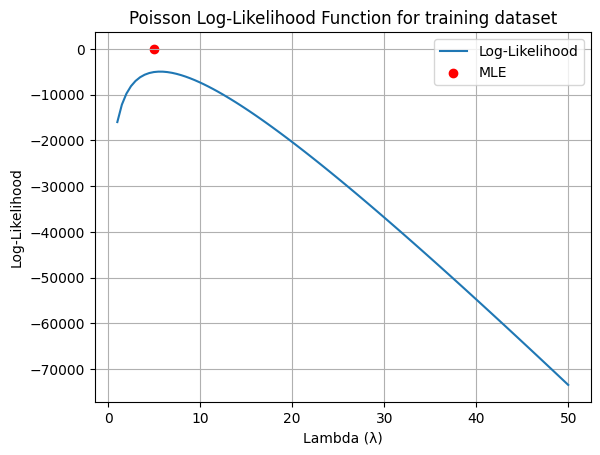

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

# Define the observed value (x)
data_points = training_data["arrivals"]

# Change this to your observed value


# Define a range of lambda values for the plot
lambda_values = np.linspace(1, 50, 100)

# Calculate the log-likelihood for each lambda value
log_likelihood = sum([-lambda_values + x * np.log(lambda_values) - np.log(np.math.factorial(x)) for x in data_points])


# Plot the log-likelihood function
plt.plot(lambda_values, log_likelihood, label='Log-Likelihood')
plt.xlabel('Lambda (λ)')
plt.ylabel('Log-Likelihood')
plt.title(f'Poisson Log-Likelihood Function for training dataset')
plt.legend()
plt.grid(True)

# Find the MLE (maximum likelihood estimate)
mle_lambda = x  # MLE for lambda is equal to the observed value

# Plot the MLE point on the graph
plt.scatter(mle_lambda, -mle_lambda + x * np.log(mle_lambda) - np.log(np.math.factorial(x)), color='red', label='MLE')
plt.legend()

plt.show()

In [38]:
from scipy.stats import poisson

# Define a range of values for the random variable (k)
k_values = np.arange(0, 20)  # Adjust the range as needed

# Choose a value for the Poisson parameter (λ)
lambda_value = np.mean(data_points)  # Adjust this to your desired λ

# Calculate the PMF for each k
pmf = poisson.pmf(k_values, mu=lambda_value)

non_pmf = list(training_data["arrivals"].value_counts().sort_index()/training_data.describe()["arrivals"]["count"])

non_pmf.insert(14,0)
non_pmf

[0.016822429906542057,
 0.02102803738317757,
 0.05186915887850467,
 0.09439252336448598,
 0.14018691588785046,
 0.16542056074766356,
 0.15700934579439252,
 0.13551401869158877,
 0.09439252336448598,
 0.06214953271028038,
 0.029906542056074768,
 0.018691588785046728,
 0.009345794392523364,
 0.002336448598130841,
 0,
 0.00046728971962616824,
 0.00046728971962616824]

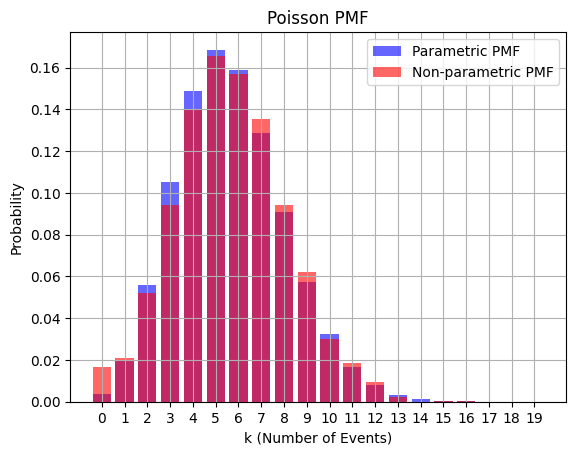

In [41]:
# Plot the Parametric PMF
plt.bar(k_values, pmf, label=f'Parametric PMF', color='blue', alpha=0.6, align='center')

# Plot the Non-parametric PMF
plt.bar(np.arange(0,17), non_pmf, label=f'Non-parametric PMF', color='RED', alpha=0.6, align='center')

# Labeling
plt.xlabel('k (Number of Events)')
plt.ylabel('Probability')
plt.title('Poisson PMF')
plt.xticks(k_values)
plt.legend()
plt.grid(True)

plt.show()

In [29]:
np.arange(0,17)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16])

In [30]:
len(non_pmf)

16

In [59]:
epmf_test

array([0.07318436, 0.01340782, 0.04357542, 0.07318436, 0.11452514,
       0.16089385, 0.16592179, 0.13072626, 0.09944134, 0.06815642,
       0.02960894, 0.0150838 , 0.00893855, 0.0027933 , 0.00055866])

In [62]:
# Compute the RMSE
epmf_test = list(testing_data["arrivals"].value_counts().sort_index()/testing_data.describe()["arrivals"]["count"])
epmf_test.append(0)
epmf_test.insert(14, 0)
epmf_test

[0.07318435754189945,
 0.013407821229050279,
 0.04357541899441341,
 0.07318435754189945,
 0.11452513966480447,
 0.16089385474860335,
 0.1659217877094972,
 0.13072625698324022,
 0.09944134078212291,
 0.06815642458100558,
 0.029608938547486034,
 0.015083798882681564,
 0.008938547486033519,
 0.002793296089385475,
 0,
 0.0005586592178770949,
 0]

In [64]:
non_pmf = list(training_data["arrivals"].value_counts().sort_index()/training_data.describe()["arrivals"]["count"])
non_pmf.insert(14, 0)
non_pmf

[0.016822429906542057,
 0.02102803738317757,
 0.05186915887850467,
 0.09439252336448598,
 0.14018691588785046,
 0.16542056074766356,
 0.15700934579439252,
 0.13551401869158877,
 0.09439252336448598,
 0.06214953271028038,
 0.029906542056074768,
 0.018691588785046728,
 0.009345794392523364,
 0.002336448598130841,
 0,
 0.00046728971962616824,
 0.00046728971962616824]

In [72]:
k_values = np.arange(0, 17)  # Adjust the range as needed

# Choose a value for the Poisson parameter (λ)
lambda_value = np.mean(data_points)  # Adjust this to your desired λ

# Calculate the PMF for each k
para_pmf = poisson.pmf(k_values, mu=lambda_value)

In [73]:
# RMSE for empirical PMF
def compute_RMSE(predicted, true):
    
    differences = np.array(predicted) - np.array(true)
    power = differences**2
    return np.mean(power)

In [74]:
RMSE_epmf = compute_RMSE(non_pmf, epmf_test) # RMSE for empirical model
RMSE_parametric = compute_RMSE(para_pmf, epmf_test)

In [76]:
RMSE_epmf

0.00027117402352078705

In [75]:
RMSE_parametric

0.0004442275617995922